In [1]:
import BayesianOptimisation.boVoronoiDirected as boVoronoiDirected
import BayesianOptimisation.expGrid as expGrid
import BayesianOptimisation.expVoronoi as expVoronoi
import BayesianOptimisation.optVoronoiDirected as optVoronoiDirected
import BayesianOptimisation.experiment_setup as experiment
from core.DataStructure import *

from importlib import reload
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import copy

In [2]:
from scipy.optimize import minimize, Bounds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Reshape
from tensorflow.keras.utils import plot_model
np.random.seed(42)

In [64]:
reload(optVoronoiDirected)

<module 'BayesianOptimisation.optVoronoiDirected' from '/home/elim/Documents/Cambridge-Master/Research/code/BayesianOptimisation/optVoronoiDirected.py'>

In [65]:
scene = "./input/random-32-32-10/scen-even/random-32-32-10-even-" + str(0) + ".scen"
exp = experiment.Experiment(scene=scene)
X, y = optVoronoiDirected.opt_voronoi_directed(exp)

Set Hyper Parameters, solving for 10 agents
Generating Data, Sample  0


NameError: name 'self' is not defined

In [29]:
pd.DataFrame(X).to_csv("./data/X-1000.csv", index=None)
pd.DataFrame(y).to_csv("./data/y-1000.csv", index=None)

In [30]:
# X_read = pd.read_csv("./data/X-1000.csv")
# X_read.shape

(1000, 1)

In [36]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    Dense(units=512, activation='relu', kernel_initializer='normal', input_shape=(1,989)),
    Dense(units=128, activation='relu',),
    Dense(units=1, activation='sigmoid'),
])

model.compile(
    loss="mean_squared_error", 
    optimizer="adam",
    metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1, 512)            506880    
_________________________________________________________________
dense_10 (Dense)             (None, 1, 128)            65664     
_________________________________________________________________
dense_11 (Dense)             (None, 1, 1)              129       
Total params: 572,673
Trainable params: 572,673
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X.reshape(1000,1,989), 
    y,
    batch_size = 64,
    epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 90004600.0000 - accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 90004528.0000 - accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 90004528.0000 - accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 90004512.0000 - accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 90004520.0000 - accuracy: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 90004512.0000 - accuracy: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 90004528.0000 - accuracy: 0.0000e+00
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 90004528.0000 - accuracy: 0.0000e+00
Epoch 9/100
16/16 [==============================] - 0s 8ms/step - loss: 90004520.0000 - accuracy: 0.0000e+00
Epoch 10/

16/16 [==============================] - 0s 10ms/step - loss: 90004536.0000 - accuracy: 0.0000e+00
Epoch 75/100
16/16 [==============================] - 0s 10ms/step - loss: 90004528.0000 - accuracy: 0.0000e+00
Epoch 76/100
16/16 [==============================] - 0s 6ms/step - loss: 90004520.0000 - accuracy: 0.0000e+00
Epoch 77/100
16/16 [==============================] - 0s 6ms/step - loss: 90004528.0000 - accuracy: 0.0000e+00
Epoch 78/100
16/16 [==============================] - 0s 9ms/step - loss: 90004520.0000 - accuracy: 0.0000e+00
Epoch 79/100
16/16 [==============================] - 0s 7ms/step - loss: 90004520.0000 - accuracy: 0.0000e+00
Epoch 80/100
16/16 [==============================] - 0s 10ms/step - loss: 90004520.0000 - accuracy: 0.0000e+00
Epoch 81/100
16/16 [==============================] - 0s 6ms/step - loss: 90004528.0000 - accuracy: 0.0000e+00
Epoch 82/100
16/16 [==============================] - 0s 9ms/step - loss: 90004520.0000 - accuracy: 0.0000e+00
Epoch 83/10

In [42]:
model.predict(X[0].reshape(1,989))

array([[1.]], dtype=float32)

In [46]:
def run_nn(arr):
    arr = np.round(arr, 2)
    print("arr", arr[0:5])
    cost = model.predict(arr.reshape(1,989))
    print("cost", cost)
    return cost

In [49]:
res = minimize(run_nn, X[0], 
    method='L-BFGS-B', jac=None, bounds= Bounds(0,1), tol=None, callback=None, 
    options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313, 
    'gtol': 1e-05, 'eps': 0.1, 'maxfun': 1, 
    'maxiter': 1, 'iprint': - 1, 'maxls': 20, 
    'finite_diff_rel_step': None})

arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.11 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 1.03 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.7  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.3  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  1.02]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0

cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]

cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]

cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]

cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]

cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]
arr [0.01 0.93 0.6  0.2  0.92]
cost [[1.]]

In [54]:
pd.DataFrame(res.x).to_csv("./data/Results-1000.csv", index=None)

In [ ]:
res.x

In [ ]:
opt, graph = boVoronoiDirected.bo_voronoi_directed(exp)

In [56]:
output = boVoronoiDirected.bo_voronoi_directed_clean(opt, graph, exp)
vordir_paths, vordir_ft, vordir_u1, vordir_u2, vordir_con, vordir_conmax, vordir_conavg, vordir_G0, vordir_G, vordir_thres = output

Cant find solution with SubGraph, reverting to original graph


In [57]:
def showAccSolution(result_graph, paths, image, nodes, start_nodes, end_nodes, all_path = True, path_num = 0):
    edges_in_path = []
    image2 = 1-image
    fig, ax = plt.subplots(figsize=(12,12))
    img = np.array(1-image)
    ax = sb.heatmap(img)
    
    for index, path in enumerate(paths):
#         path = paths[path_num]
        for ite in range(len(path)-1):
            edges_in_path.append(np.array([path[ite],path[ite+1],0]))
            p1 = result_graph.nodes[path[ite]]['position']
            p2 = result_graph.nodes[path[ite+1]]['position']

            for r in (p1.x, p2.x, 1):
                for c in (p1.y, p2.y, 1):
                    if (Point(r,c) in np.array(nodes)[end_nodes]):
                        image2[int(r),int(c)] = 1
                    else:
                        image2[int(r),int(c)] += 0.2

        drawn = {}
        loop = result_graph.edges if all_path else edges_in_path

        for elem in loop:
            cur = result_graph.edges[elem[0], elem[1], 0]['probability']
            opposite = result_graph.edges[elem[1], elem[0], 0]['probability']
            unused = 1 - cur - opposite
            scaler = 0.7
            if cur > opposite:
                p1 = result_graph.nodes[elem[0]]['position']
                arr1 = np.array([p1.x,p1.y])
                p2 = result_graph.nodes[elem[1]]['position']
                arr2 = np.array([p2.x,p2.y])
                direction = (arr2-arr1) / np.linalg.norm(arr2 - arr1)
                mag = np.linalg.norm(arr2 - arr1)*scaler
                dx, dy = mag*direction
            else:
                p1 = result_graph.nodes[elem[1]]['position']
                arr1 = np.array([p1.x,p1.y])
                p2 = result_graph.nodes[elem[0]]['position']
                arr2 = np.array([p2.x,p2.y])
                direction = (arr2-arr1) / np.linalg.norm(arr2 - arr1)
                mag = np.linalg.norm(arr2 - arr1)*scaler
                dx, dy = mag*direction

            plt.arrow(p1.y, p1.x, dy, dx, head_width = 0.4, alpha=0.5, color = 'grey', linewidth=1)
    
#         p = start_nodes[index]
#         plt.scatter(nodes[p].y, nodes[p].x, color = 'red', linewidths=5)
#         p = end_nodes[index]
#         plt.scatter(nodes[p].y, nodes[p].x, color = 'lime', linewidths=5)
#         name = './results/vordir_path'+ str(path_num)+'.png'
#         plt.gca().invert_yaxis()
#         plt.savefig(name)
        
    for p in start_nodes:
        plt.scatter(nodes[p].y, nodes[p].x, color = 'red', linewidths=5)
    for p in end_nodes:
        plt.scatter(nodes[p].y, nodes[p].x, color = 'lime', linewidths=5)
        
#     name = './results/'+ str(15+2)+'.png'
    plt.gca().invert_yaxis()
#     plt.savefig(name)
    return fig

In [58]:
def updateEdgeProbability(graph, probability):
    i = 0
    assigned = {}
    idx = int((len(probability)-1)/2)
    unused_p = probability[:idx]
    direction_p = probability[idx:-1]
    for n in graph.nodes:
        for neighbor in graph.neighbors(n):
            if n != neighbor and frozenset((n, neighbor)) not in assigned.keys():
                unused = unused_p[i]
                graph.edges[n, neighbor, 0]['probability'] = (1-unused_p[i])*direction_p[i]
                graph.edges[neighbor, n, 0]['probability'] = (1-unused_p[i])*(1-direction_p[i])
                assigned[frozenset((n, neighbor))] = 1
                i += 1
    return graph

In [59]:
opt_G = updateEdgeProbability(vordir_G0,res.x)

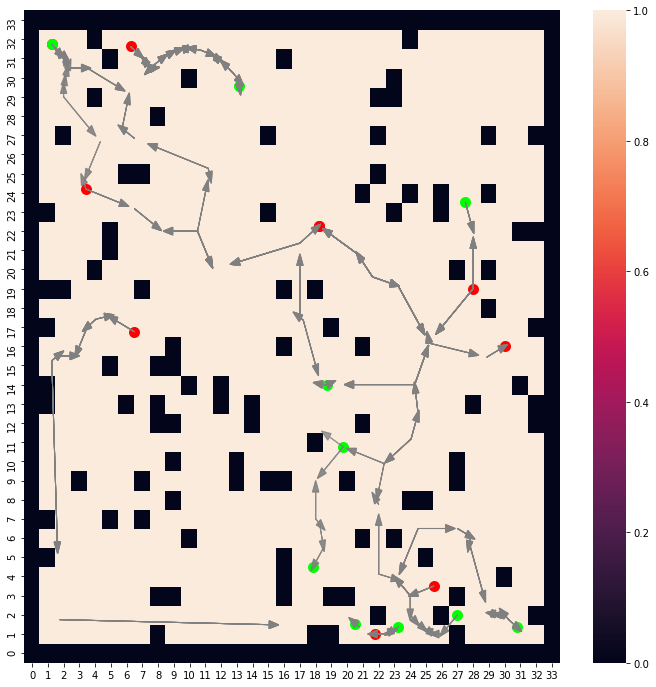

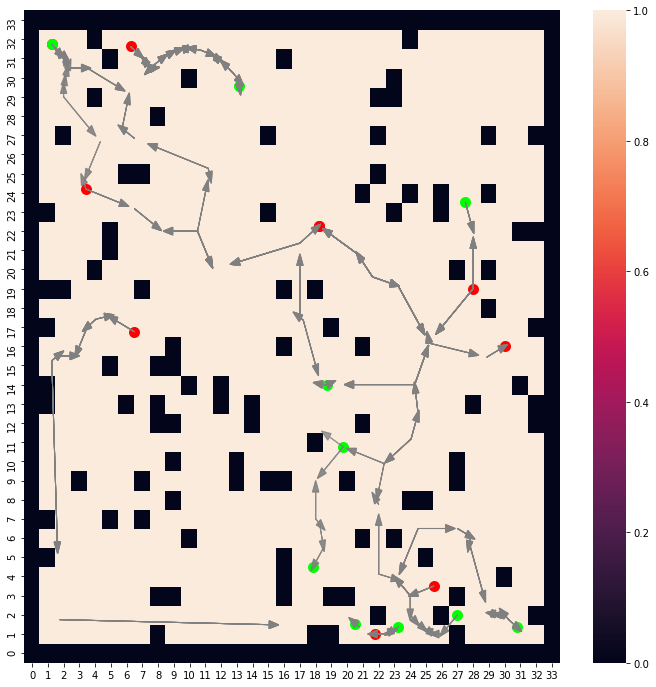

In [60]:
showAccSolution(opt_G, 
                vordir_paths, 
                exp.image, 
                exp.nodes, 
                exp.start_nodes, 
                exp.end_nodes, 
                all_path = False, 
                path_num = 0)

In [ ]:
# from scipy.optimize import minimize, rosen, rosen_der
# x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
# res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
# res.x

In [ ]:
# import numpy as np
# from sklearn.linear_model import SGDRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# n_samples, n_features = 10, 5
# rng = np.random.RandomState(0)
# y = rng.randn(n_samples)
# X = rng.randn(n_samples, n_features)
# # Always scale the input. The most convenient way is to use a pipeline.
# reg = make_pipeline(StandardScaler(),
#                     SGDRegressor(max_iter=1000, tol=1e-3))
# reg.fit(X, y)

In [ ]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.compose import TransformedTargetRegressor
# tt = TransformedTargetRegressor(regressor=SGDRegressor(max_iter=1000, tol=1e-3),
#                                 func=np.log, inverse_func=np.exp)
# X = np.arange(4).reshape(-1, 1)
# y = np.exp(2 * X).ravel()
# tt.fit(X, y)

# tt.score(X, y)

# tt.regressor_.coef_